# Forex logistic regression model

### this algorithm doesnt perform well on forex data with around 40-50% prediction compared to average 70% detecting cats or not cats

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("./datasets/5_min_EUR_USD_2019_to_2023_mid_prices.csv")
df

,time,EUR_USD
0,2018-08-22 02:40:00+00:00,1.15758
1,2018-08-22 02:45:00+00:00,1.15750
2,2018-08-22 02:50:00+00:00,1.15726
3,2018-08-22 02:55:00+00:00,1.15746
4,2018-08-22 03:00:00+00:00,1.15746
...,...,...
372104,2023-08-22 08:15:00+00:00,1.09182
372105,2023-08-22 08:20:00+00:00,1.09184
372106,2023-08-22 08:25:00+00:00,1.09183
372107,2023-08-22 08:30:00+00:00,1.09174


In [3]:
symbol = 'EUR_USD'
features_col_names = ["price", 'returns', "dir"]
window = 50 # rolling window 
df["returns"] = np.log(df[symbol] / df[symbol].shift())
# if its positive we assign it [1] else negative [0]
# Since this is a logistic regression Binary classification model its best to predict either 0 or 1 we cant make it 
# make it predict -1 if the price went down
df['dir'] = np.where(df['returns'] > 0, 1, 0)
# sma strategy calculate the distance between sma 50 and sma 150
df.dropna(inplace = True)

In [4]:
df.head(50)

,time,EUR_USD,returns,dir
1,2018-08-22 02:45:00+00:00,1.15750,-0.000069,0
2,2018-08-22 02:50:00+00:00,1.15726,-0.000207,0
3,2018-08-22 02:55:00+00:00,1.15746,0.000173,1
4,2018-08-22 03:00:00+00:00,1.15746,0.000000,0
5,2018-08-22 03:05:00+00:00,1.15726,-0.000173,0
6,2018-08-22 03:10:00+00:00,1.15729,0.000026,1
7,2018-08-22 03:15:00+00:00,1.15738,0.000078,1
8,2018-08-22 03:20:00+00:00,1.15727,-0.000095,0
9,2018-08-22 03:25:00+00:00,1.15740,0.000112,1
10,2018-08-22 03:30:00+00:00,1.15753,0.000112,1


In [5]:
# df = pd.DataFrame({
#     'column_1': range(1, 100, 1),  # Starts from 1, ends at 200, and increases by 2
#     'column_2': range(-1, -100, -1)   # Starts from 2, ends at 201, and increases by 2
# })

# # Print the DataFrame
# df.head(50)

In [6]:
# np.sign(df['returns']) == np.sign(df['dir']) # check that the dir and return are correct

In [7]:
def create_sequences(df, seq_length):
    X, y = [], []
    for i in range(0, len(df)-seq_length, seq_length):
        X.append(df[df.columns[1]].iloc[i:i+seq_length])
        y.append(df[df.columns[3]].iloc[i+seq_length - 1])
    return np.array(X), np.array(y)

In [8]:
X, y = create_sequences(df, 300)

In [9]:
X.shape # we have 24807 training examples 

(1240, 300)

In [10]:
y.shape # we have 24807 labels

(1240,)

In [11]:
# Standarize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set_y = y_train.reshape(1, -1)
test_set_y = y_test.reshape(1, -1)

In [13]:
print(f"""
X_train shape: {X_train.shape}
y_train shape: {train_set_y.shape}
""")


X_train shape: (992, 300)
y_train shape: (1, 992)



In [14]:
train_set_x = X_train.reshape(X_train.shape[0], -1).T
test_set_x = X_test.reshape(X_test.shape[0], -1).T

In [15]:
print(f"""
train_set_x shape: {train_set_x.shape}
test_set_x shape: {test_set_x.shape}

train_set_y shape: {train_set_y.shape}
test_set_y shape: {test_set_y.shape}
""")


train_set_x shape: (300, 992)
test_set_x shape: (300, 248)

train_set_y shape: (1, 992)
test_set_y shape: (1, 248)



In [16]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    """
    return 1 / (1 + np.exp(-z))

In [17]:

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    w = np.zeros((dim, 1))
    b = float(0)
    return w, b

In [18]:
w, b = initialize_with_zeros(train_set_x.shape[0])

In [19]:
w.shape

(300, 1)

In [20]:
b

0.0

# Forward and Back Prop

In [40]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    A = sigmoid(np.dot(w.T, X) + b)
    # w.T @ X # can also use the @ symbol for dot product
    # cost = -1/m*np.sum(Y*np.log(A)+ (1-Y)*np.log(1-A))
    # compute cost by using np.dot to perform multiplication. 
    # cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = -1/m * np.sum( np.multiply(np.log(A), Y) + np.multiply(np.log(1-A), (1-Y)))

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m*np.dot(X, (A-Y).T)
    db =1/m*np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# Optimizing

In [41]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate * dw # w1 - learning_rate * dw1
        b = b - learning_rate * db # b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Predict

In [42]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X)+b)
    
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        # print("Predicition:", A[0, i])
        if A[0, i] > .5 :
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

# MODEL

In [43]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = params["w"]
    b = params["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [44]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y)

Cost after iteration 0: 0.693147
Cost after iteration 100: 2.439884
Cost after iteration 200: 2.446232
Cost after iteration 300: 2.453097
Cost after iteration 400: 2.460938
Cost after iteration 500: 2.469400
Cost after iteration 600: 2.478245
Cost after iteration 700: 2.487338
Cost after iteration 800: 2.496594
Cost after iteration 900: 2.505952
Cost after iteration 1000: 2.515364


/var/folders/kg/7xftw3_12y10ppg5bv5lb26w0000gn/T/ipykernel_79880/786930175.py:30: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum( np.multiply(np.log(A), Y) + np.multiply(np.log(1-A), (1-Y)))
/var/folders/kg/7xftw3_12y10ppg5bv5lb26w0000gn/T/ipykernel_79880/786930175.py:30: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum( np.multiply(np.log(A), Y) + np.multiply(np.log(1-A), (1-Y)))


Cost after iteration 1100: 2.524787
Cost after iteration 1200: 2.534189
Cost after iteration 1300: 2.543541
Cost after iteration 1400: 2.552820
Cost after iteration 1500: 2.562008
Cost after iteration 1600: 2.571089
Cost after iteration 1700: 2.580052
Cost after iteration 1800: 2.588888
Cost after iteration 1900: 2.597590
train accuracy: 49.39516129032258 %
test accuracy: 45.16129032258065 %


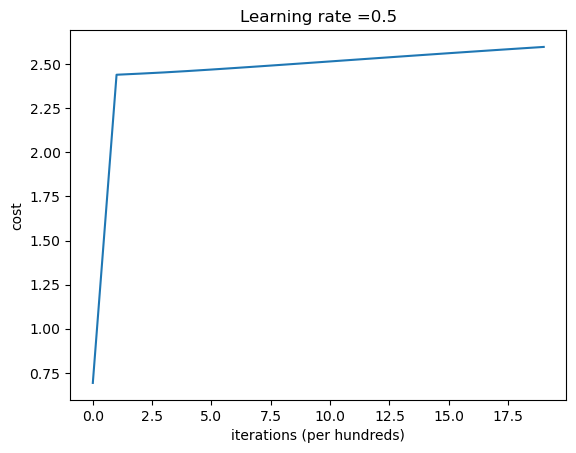

In [45]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01


/var/folders/kg/7xftw3_12y10ppg5bv5lb26w0000gn/T/ipykernel_79880/786930175.py:30: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum( np.multiply(np.log(A), Y) + np.multiply(np.log(1-A), (1-Y)))
/var/folders/kg/7xftw3_12y10ppg5bv5lb26w0000gn/T/ipykernel_79880/786930175.py:30: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum( np.multiply(np.log(A), Y) + np.multiply(np.log(1-A), (1-Y)))



-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------

Training a model with learning rate: 1e-16

-------------------------------------------------------



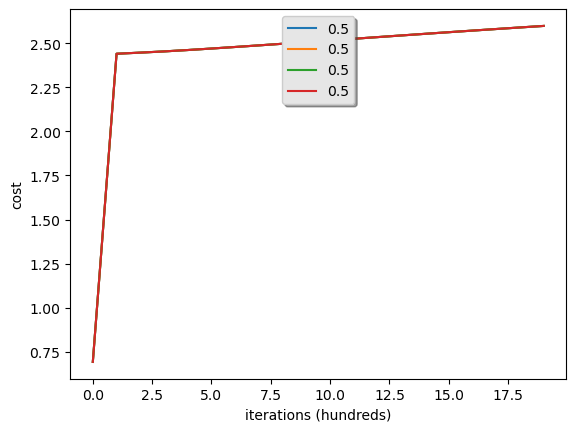

In [46]:
learning_rates = [0.01, 0.001, 0.0001, 0.0000000000000001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()